In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install plotly pandas

In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go              # Plotly graph_objects moduljának importálása. rafikonelemek (pl. vonalas, oszlopdiagramok)
from plotly.subplots import make_subplots      # make_subplots függvény importálása. alábra, vagyis egy grafikonon belül több részdiagram

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [17]:
gamestop=yf.Ticker('GME')

In [19]:
gme_data=gamestop.history(period='max')

In [23]:
gme_data.reset_index(inplace=True)

In [27]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data2=requests.get(url).text

In [33]:
soup=BeautifulSoup(html_data2, 'html.parser')

In [37]:
read_html_pandas_data = pd.read_html(url)
gme_revenue = read_html_pandas_data[0]
gme_revenue.columns=['Date', 'Revenue']
gme_revenue.head()

,Date,Revenue
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"


In [39]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r',|\$', '', regex=True)

In [43]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


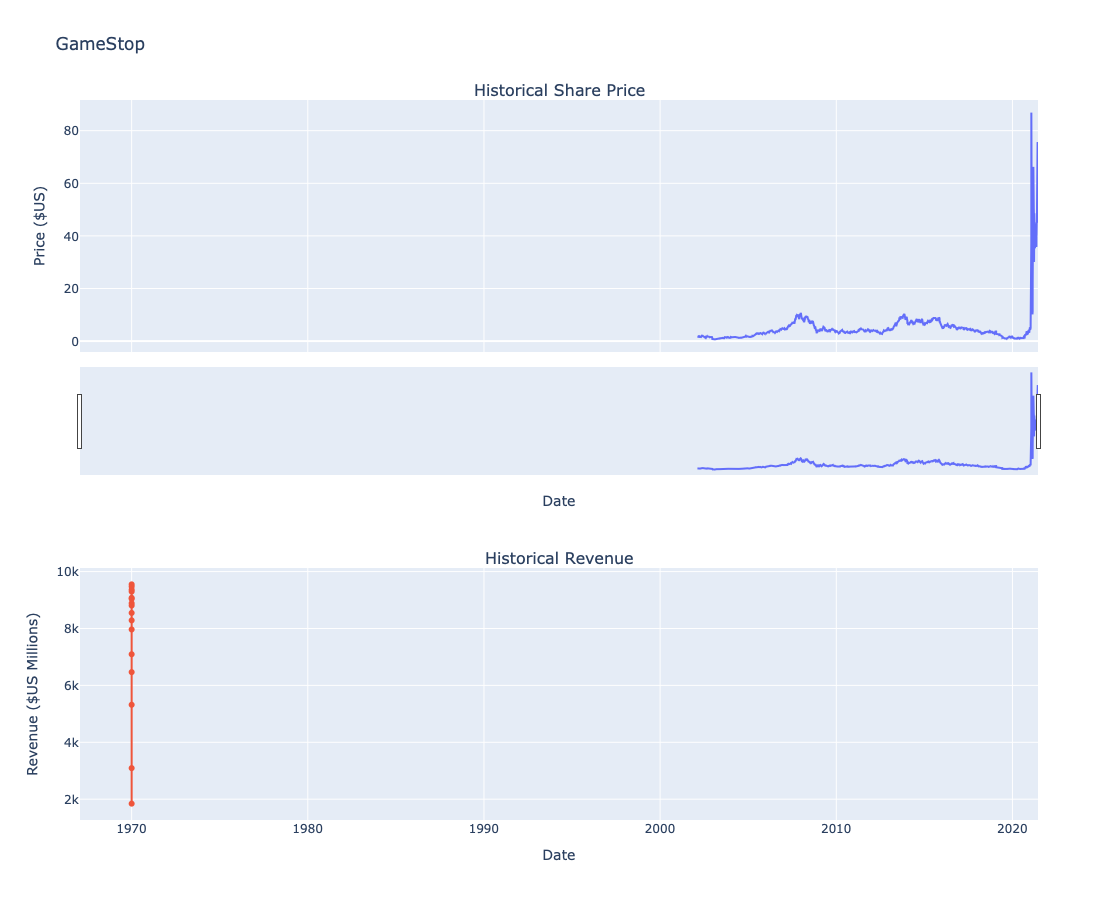

In [47]:
# make_graph nevű függvény létrehozása, 3 paraméterrel
def make_graph(stock_data, revenue_data, stock):
    
    # A dátumok konvertálása datetime típusra, errors='coerce' paraméter segít eltávolítani a hibás dátumokat
    stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'], errors='coerce')
    
    # Szűrés 2021. június 14-ig
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    
    # Szűrés 2021. április 30-ig
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    # Ha a Revenue oszlopban van nem numerikus karakter (pl. $, ,), azt eltávolítjuk és float típusra konvertáljuk
    revenue_data_specific['Revenue'] = revenue_data_specific['Revenue'].replace({',': '', '$': ''}, regex=True)
    revenue_data_specific['Revenue'] = revenue_data_specific['Revenue'].astype(float)

    # Két alábrából álló ábra létrehozása
    fig = make_subplots(
        rows=2, cols=1, 
        shared_xaxes=True, 
        subplot_titles=("Historical Share Price", "Historical Revenue"), 
        vertical_spacing = .3
    )
    
    # Árukészlet ábrázolása
    fig.add_trace(go.Scatter(
        x=stock_data_specific['Date'], 
        y=stock_data_specific['Close'], 
        name="Share Price"), 
        row=1, col=1
    )
    
    # Bevétel ábrázolása
    fig.add_trace(go.Scatter(
        x=revenue_data_specific['Date'], 
        y=revenue_data_specific['Revenue'], 
        name="Revenue"), 
        row=2, col=1
    )
    
    # Tengelyek címkézése
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Ábrázolás beállítása
    fig.update_layout(
        showlegend=False,   # Jelmagyarázat elrejtése
        height=900,         # Grafikon magassága
        title=stock,        # A grafikon címe
        xaxis_rangeslider_visible=True  # Időbeli görgetés lehetősége
    )
    
    # A grafikon megjelenítése
    fig.show()

make_graph(gme_data, gme_revenue, 'GameStop')